In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Scaling (Z-score Normalization)

In [5]:
scaler = StandardScaler() # Z-score Normalization
x = scaler.fit_transform(df) # Numpy Array
df_scaled = pd.DataFrame(x, columns=iris.feature_names)
df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


## PCA

In [6]:
pca = PCA(2)

In [7]:
df_reduced = pca.fit_transform(df_scaled) # Numpy Array

In [8]:
df_final = pd.DataFrame(df_reduced, columns=['PC1', 'PC2'])

In [9]:
final_df = pd.concat([df_final, pd.DataFrame(iris.target, columns=['Target'])], axis=1)
final_df

,PC1,PC2,Target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0
...,...,...,...
145,1.870503,0.386966,2
146,1.564580,-0.896687,2
147,1.521170,0.269069,2
148,1.372788,1.011254,2


In [10]:
a = pca.explained_variance_ratio_
a[0] + a[1]

0.9581320720000164

## Visualization

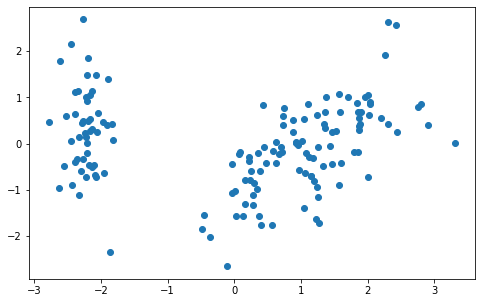

In [11]:
fig = plt.figure(figsize=(8,5))
plt.scatter(df_final['PC1'], df_final['PC2'],)

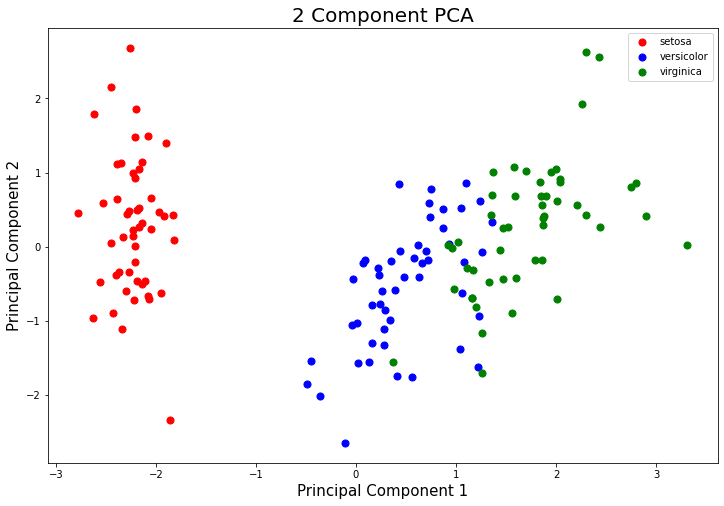

In [12]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = [0, 1, 2]
colors = ['r', 'b', 'g']

for target, color in zip(targets,colors):
    indicesToKeep = final_df['Target'] == target
    ax.scatter(  final_df.loc[indicesToKeep, 'PC1']
               , final_df.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50  )
    
ax.legend(iris.target_names)